<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [135]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [136]:
# A:
my_dict = {'X': [i for i in range(1, 11)], 'Y': [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [137]:
# A:
pre_df = pd.DataFrame(my_dict)

### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [138]:
# A:
new_data = pd.DataFrame()

In [139]:
new_data['x2'] = pre_df['X'] + 10
new_data['y2'] = pre_df['Y'] + 3

### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [140]:
# A:
df = pd.concat([pre_df, new_data.rename(columns={'x2':'X','y2':'Y'})], ignore_index=True)
df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

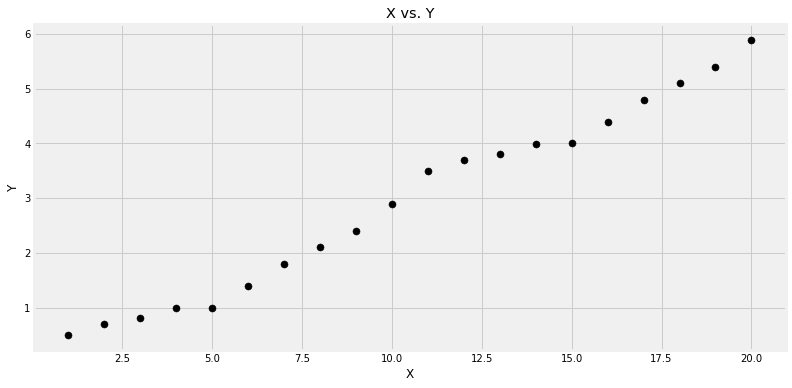

In [141]:
# A:
df.plot.scatter('X', 'Y', s = 50, c = 'black', title = 'X vs. Y', figsize = (12, 6));

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [142]:
# A:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[['X']], df.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [143]:
lr.coef_

array([0.28996992])

In [144]:
lr.intercept_

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [145]:
# A:
lr.score(df[['X']], df.Y)

In [146]:
type(df['X'])

pandas.core.series.Series

In [147]:
type(df[['X']])

pandas.core.frame.DataFrame

### Using the above, write the equation for our model

In [148]:
import sympy as sy
ans = 'The equation for the model is y = {:.3f}x + {:.3f}'.format(float(lr.coef_), float(lr.intercept_))

In [149]:
sy.pprint(ans)

The equation for the model is y = 0.290x + -0.086


### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [150]:
# A
sy.init_printing()
def predictor(x): return lr.coef_*x + lr.intercept_
print('The value of my prediction for {} is {}'.format(20, predictor(20)))
print('The value of my prediction for {} is {}'.format(21, predictor(21)))


The value of my prediction for 20 is [5.71371429]
The value of my prediction for 21 is [6.00368421]


### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [151]:
# A:
lr.predict(np.array([[20], [21]]))

array([5.71371429, 6.00368421])

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [152]:
diff = (lr.predict(df[['X']]) - df['Y'])**2


### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

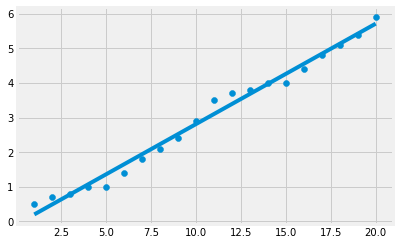

In [153]:
# A:
plt.scatter(df.X, df.Y)
plt.plot(df.X, lr.predict(df[['X']]))

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [154]:
# A:
from sklearn.preprocessing import PolynomialFeatures
feats = PolynomialFeatures(degree = 5)
poly_feats = feats.fit_transform(df[['X']])

poly_X = pd.DataFrame(poly_feats) 

pdf = pd.merge(df, poly_X, on = df.index)

In [155]:
pdf.head()

,key_0,X,Y,0,1,2,3,4,5
0,0,1,0.50,1.0,1.0,1.0,1.0,1.0,1.0
1,1,2,0.70,1.0,2.0,4.0,8.0,16.0,32.0
2,2,3,0.80,1.0,3.0,9.0,27.0,81.0,243.0
3,3,4,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,4,5,1.00,1.0,5.0,25.0,125.0,625.0,3125.0


In [156]:
X = pdf[[0, 1, 2, 3, 4, 5]]
Y = pdf.Y
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Print out the model's predictions and save them as poly_yhat

In [157]:
# A:
poly_yhat = lr.predict(X)

### Calculate the SSE

In [158]:
# A:
sse = (poly_yhat - pdf['Y'])**2

In [159]:
np.mean((poly_yhat - pdf['Y']))

In [160]:
np.std((poly_yhat - pdf['Y']))

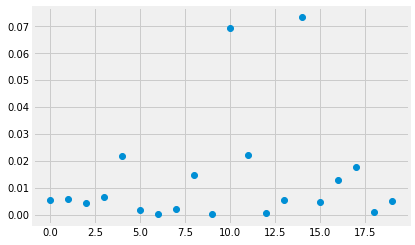

In [161]:
plt.plot(sse, 'o')

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [162]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: